In [ ]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("dataset.xlsx")

In [ ]:
df.head(5)

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaT,2021-06-28 22:26:00,0.01,2021-07-01 13:26:00,10.00,NaT,NaN,2021-07-01 13:44:00,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaT,2021-03-30 14:30:00,0.01,2021-03-30 14:30:00,0.01,2021-03-30 14:35:00,0.01,2021-04-09 08:30:00,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaT,2021-04-16 16:57:00,0.10,2021-04-16 16:57:00,0.10,NaT,NaN,2021-04-17 14:15:00,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaT,2021-04-17 15:20:00,0.01,2021-04-17 15:20:00,0.01,NaT,NaN,2021-04-17 15:24:00,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaT,2021-04-01 19:10:00,7.13,2021-04-02 11:00:00,7.13,2021-04-02 15:52:00,7.13,2021-04-12 14:30:00,7.13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22914 non-null  int64         
 1   fire_number                   22914 non-null  object        
 2   fire_name                     604 non-null    object        
 3   current_size                  22914 non-null  float64       
 4   size_class                    22914 non-null  object        
 5   fire_location_latitude        22914 non-null  float64       
 6   fire_location_longitude       22914 non-null  float64       
 7   fire_origin                   22905 non-null  object        
 8   general_cause_desc            22914 non-null  object        
 9   industry_identifier_desc      408 non-null    object        
 10  responsible_group_desc        9031 non-null   object        
 11  activity_class              

In [ ]:
df.describe()

,fire_year,current_size,fire_location_latitude,fire_location_longitude,discovered_size,assessment_hectares,fire_spread_rate,temperature,relative_humidity,wind_speed,fire_fighting_start_size,distance_from_water_source,bh_hectares,uc_hectares,to_hectares,ex_hectares
count,22914.000000,22914.000000,22914.000000,22914.000000,0.0,22914.000000,20305.000000,20257.000000,20255.000000,20254.000000,16507.000000,6365.000000,22914.000000,22914.000000,2444.000000,22914.000000
mean,2012.820896,155.060680,54.953780,-115.222288,NaN,2.154478,0.869692,17.859303,45.424438,8.763059,5.311316,2.648594,114.266344,168.228295,1.762881,155.060680
std,4.517263,5906.681475,2.642913,2.309475,NaN,60.137154,2.573896,7.539028,18.737953,8.456218,109.736761,21.405949,5986.559818,6978.850959,12.589448,5906.681475
min,2006.000000,0.010000,48.998195,-119.999983,NaN,0.010000,-1.000000,-35.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000
25%,2009.000000,0.010000,53.075638,-116.791542,NaN,0.010000,0.000000,14.000000,31.000000,3.000000,0.010000,0.500000,0.010000,0.010000,0.010000,0.010000
50%,2013.000000,0.020000,55.300575,-115.151046,NaN,0.010000,0.000000,19.000000,40.000000,6.000000,0.020000,1.000000,0.010000,0.020000,0.010000,0.020000
75%,2016.000000,0.300000,56.797629,-114.330646,NaN,0.200000,1.000000,23.000000,56.000000,12.000000,0.300000,2.000000,0.300000,0.300000,0.200000,0.300000
max,2021.000000,577646.800000,59.999510,-110.000917,NaN,6019.000000,100.000000,39.900000,100.000000,90.000000,6728.000000,700.000000,602417.000000,707648.000000,244.200000,577646.800000


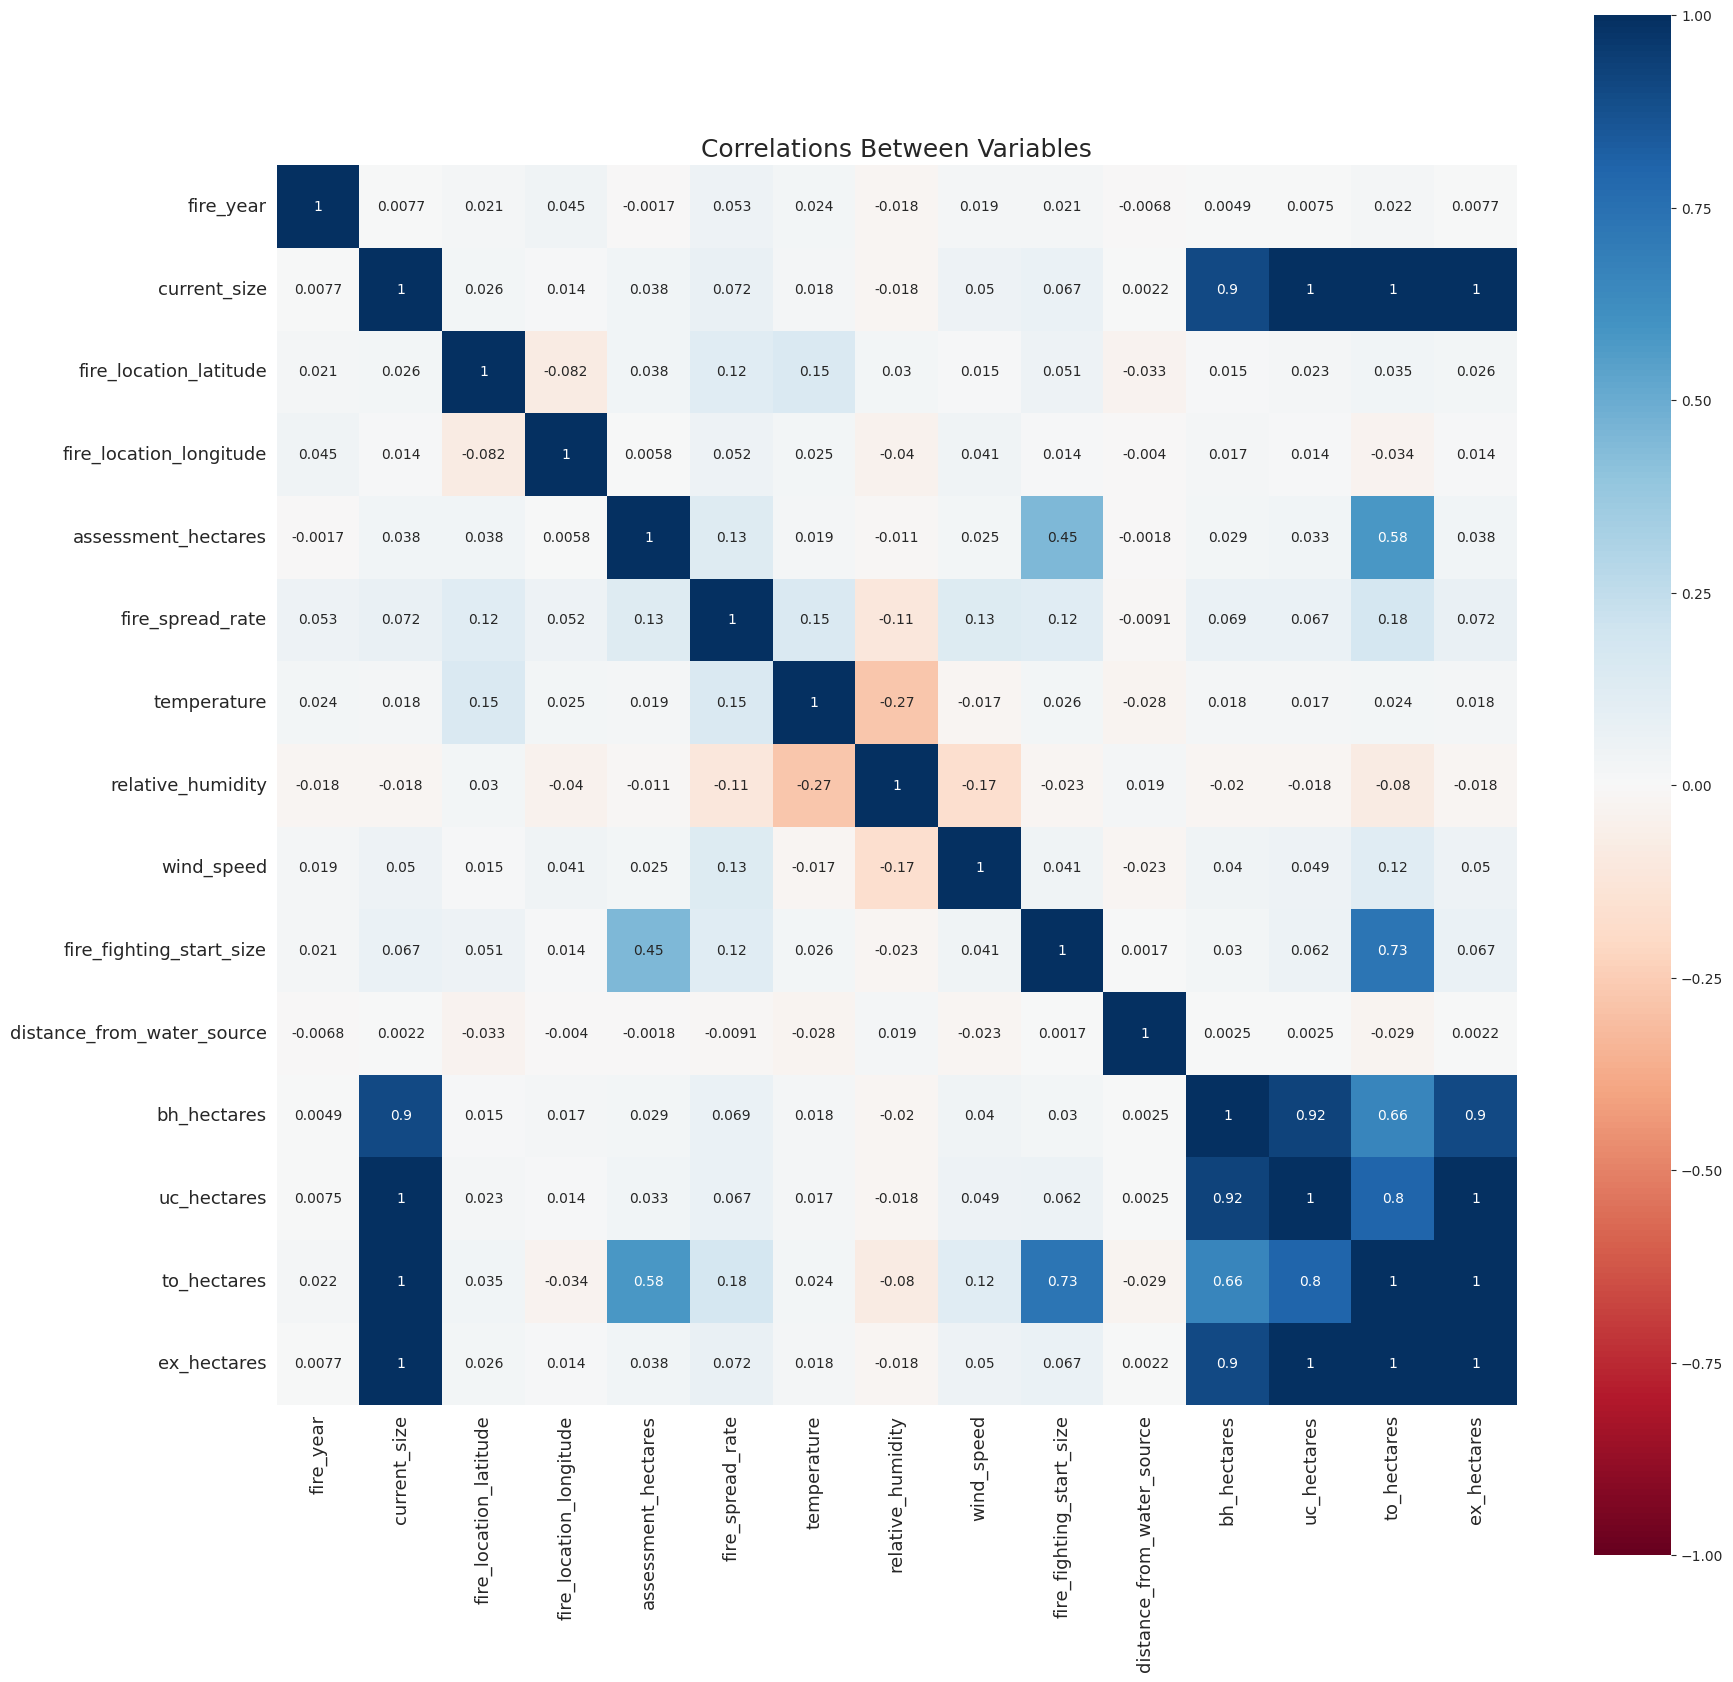

In [ ]:
numeric=df.select_dtypes(include=['int64','float64']).drop("discovered_size",axis=1)
plt.figure(figsize = (20,20))
sns.heatmap(numeric.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Height (in cm)'])
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x = "relative_humidity", data = df)
plt.title('Humidity spread',size=18)
plt.xlabel('relative humidity',size=14)
plt.show()

In [ ]:
plt.figure(figsize = (20,6))
sns.scatterplot(x='wind_speed',y='fire_spread_rate',color='r',data=df)
plt.title('Effect of wind speed on fire spread rate',size=18)
plt.xlabel('Wind speed',size=14)
plt.ylabel('Fire spread rate',size=14)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(df.fire_spread_rate,color='r')
plt.title('Fire Spread Rate',size=18)
plt.xlabel('Spread rate',size=14)
plt.ylabel('Density',size=14)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x = "size_class", data = df)
plt.title('Distribution of size class',size=18)
plt.xlabel('classes',size=14)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x = "fire_origin", data = df)
plt.title('Humidity spread',size=18)
plt.xlabel('relative humidity',size=14)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x = "fuel_type", data = df)
plt.title('Fuel',size=18)
plt.xlabel('Fuel',size=14)
plt.show()

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x = "true_cause", data = df)
plt.title('Distribution of fre based on cause',size=18)
plt.xlabel('Cause',size=14)
plt.show()

In [ ]:
df=df.drop(["fire_number","fire_name","size_class","discovered_size","industry_identifier_desc","to_fs_date","to_hectares"],axis=1)

In [ ]:
df.head()

,fire_year,current_size,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,responsible_group_desc,activity_class,true_cause,fire_start_date,...,fire_fighting_start_size,bucketing_on_fire,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,ex_fs_date,ex_hectares
0,2021,5.50,59.522139,-119.926971,Provincial Land,Lightning,NaN,NaN,NaN,6/28/10 9:07,...,5.5,N,NaN,NaN,6/28/21 22:26,0.01,7/1/21 13:26,10.00,7/1/21 13:44,5.50
1,2021,0.01,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,Debris Disposal,Winter Burning,3/25/20 8:00,...,NaN,NaN,NaN,NaN,3/30/21 14:30,0.01,3/30/21 14:30,0.01,4/9/21 8:30,0.01
2,2021,0.10,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,Arson,NaN,4/16/20 16:20,...,0.1,N,NaN,NaN,4/16/21 16:57,0.10,4/16/21 16:57,0.10,4/17/21 14:15,0.10
3,2021,0.01,56.425933,-111.160750,Indian Reservation,Resident,NaN,Cooking and Warming,Unsafe Fire,4/16/20 17:00,...,NaN,NaN,NaN,NaN,4/17/21 15:20,0.01,4/17/21 15:20,0.01,4/17/21 15:24,0.01
4,2021,7.13,53.693450,-116.058633,Private Land,Resident,NaN,Debris Disposal,Unsafe Fire,11/1/20 10:00,...,NaN,NaN,NaN,NaN,4/1/21 19:10,7.13,4/2/21 11:00,7.13,4/12/21 14:30,7.13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   current_size                  22914 non-null  float64
 2   fire_location_latitude        22914 non-null  float64
 3   fire_location_longitude       22914 non-null  float64
 4   fire_origin                   22905 non-null  object 
 5   general_cause_desc            22914 non-null  object 
 6   responsible_group_desc        9031 non-null   object 
 7   activity_class                14204 non-null  object 
 8   true_cause                    12488 non-null  object 
 9   fire_start_date               22294 non-null  object 
 10  det_agent                     22913 non-null  object 
 11  det_agent_type                22913 non-null  object 
 12  discovered_date               18936 non-null  object 
 13  r

In [ ]:
print(df.isnull().sum())

fire_year                           0
current_size                        0
fire_location_latitude              0
fire_location_longitude             0
fire_origin                         9
general_cause_desc                  0
responsible_group_desc          13883
activity_class                   8710
true_cause                      10426
fire_start_date                   620
det_agent                           1
det_agent_type                      1
discovered_date                  3978
reported_date                       1
dispatched_resource                 6
dispatch_date                       6
start_for_fire_date                 7
assessment_resource                 0
assessment_datetime                 0
assessment_hectares                 0
fire_spread_rate                 2609
fire_type                        2477
fire_position_on_slope           2649
weather_conditions_over_fire     2656
temperature                      2657
relative_humidity                2659
wind_directi

In [ ]:
strings=df.select_dtypes(include=['object']).columns
df[strings]=df[strings].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22914 non-null  int64         
 1   current_size                  22914 non-null  float64       
 2   fire_location_latitude        22914 non-null  float64       
 3   fire_location_longitude       22914 non-null  float64       
 4   fire_origin                   22914 non-null  object        
 5   general_cause_desc            22914 non-null  object        
 6   responsible_group_desc        22914 non-null  object        
 7   activity_class                22914 non-null  object        
 8   true_cause                    22914 non-null  object        
 9   fire_start_date               22914 non-null  object        
 10  det_agent                     22914 non-null  object        
 11  det_agent_type              

In [ ]:
df.shape

(22914, 43)

In [ ]:
dates=df.select_dtypes(include=['datetime64[ns]']).columns
print(dates)

Index(['discovered_date', 'reported_date', 'dispatch_date',
       'start_for_fire_date', 'assessment_datetime', 'ia_arrival_at_fire_date',
       'fire_fighting_start_date', 'first_bucket_drop_date', 'bh_fs_date',
       'uc_fs_date', 'ex_fs_date'],
      dtype='object')


In [ ]:
#df=df.drop(df.columns[36:42],axis=1)
#df.drop("ex_hectares",inplace=True,axis=1)
#df=df.drop(df.columns[29:35],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fire_year                     22914 non-null  int64         
 1   current_size                  22914 non-null  float64       
 2   fire_location_latitude        22914 non-null  float64       
 3   fire_location_longitude       22914 non-null  float64       
 4   fire_origin                   22914 non-null  object        
 5   general_cause_desc            22914 non-null  object        
 6   responsible_group_desc        22914 non-null  object        
 7   activity_class                22914 non-null  object        
 8   true_cause                    22914 non-null  object        
 9   fire_start_date               22914 non-null  object        
 10  det_agent                     22914 non-null  object        
 11  det_agent_type              

In [ ]:
df.nunique()

fire_year                          16
current_size                     1324
fire_location_latitude          21039
fire_location_longitude         21410
fire_origin                         8
general_cause_desc                 15
responsible_group_desc             33
activity_class                     35
true_cause                         22
fire_start_date                 17162
det_agent                         149
det_agent_type                      5
discovered_date                 18112
reported_date                   21879
dispatched_resource                 8
dispatch_date                   21894
start_for_fire_date             21912
assessment_resource                 4
assessment_datetime             22113
assessment_hectares               218
fire_spread_rate                   56
fire_type                           6
fire_position_on_slope              6
weather_conditions_over_fire        6
temperature                       333
relative_humidity                 101
wind_directi

In [ ]:
dates=df.select_dtypes(include=['datetime']).columns
print(dates)

Index(['discovered_date', 'reported_date', 'dispatch_date',
       'start_for_fire_date', 'assessment_datetime'],
      dtype='object')


In [ ]:
df['fire_start_date'] = pd.to_datetime(df['fire_start_date'],errors='coerce')
df['reported_date'] = pd.to_datetime(df['reported_date'],errors='coerce')
df['discovered_date'] = pd.to_datetime(df['discovered_date'],errors='coerce')
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'],errors='coerce')
df['start_for_fire_date'] = pd.to_datetime(df['start_for_fire_date'],errors='coerce')
df['assessment_datetime'] = pd.to_datetime(df['assessment_datetime'],errors='coerce')

In [ ]:
df[dates].dtypes

discovered_date        datetime64[ns]
reported_date          datetime64[ns]
dispatch_date          datetime64[ns]
start_for_fire_date    datetime64[ns]
assessment_datetime    datetime64[ns]
dtype: object

In [ ]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,time_delta_13,time_delta_14,time_delta_15,time_delta_16,time_delta_17,time_delta_18,time_delta_19,time_delta_110,time_delta_111,time_delta_112
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,4018 days 07:37:00,4018 days 07:37:00,4018 days 07:37:00,4018 days 07:36:00,4019 days 06:46:00,NaT,4018 days 13:19:00,4021 days 04:19:00,4018 days 07:36:00,4018 days 07:36:00
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,370 days 06:31:00,370 days 06:32:00,370 days 06:30:00,NaT,NaT,NaT,370 days 06:30:00,370 days 06:30:00,NaT,370 days 06:00:00
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,365 days 00:13:00,365 days 00:14:00,365 days 00:30:00,365 days 00:28:00,365 days 00:30:00,NaT,365 days 00:37:00,365 days 00:37:00,365 days 00:10:00,365 days 00:12:00
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,365 days 21:20:00,365 days 21:30:00,365 days 22:20:00,NaT,NaT,NaT,365 days 22:20:00,365 days 22:20:00,NaT,365 days 21:05:00
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,151 days 05:11:00,151 days 05:28:00,151 days 06:29:00,NaT,NaT,NaT,151 days 09:10:00,152 days 01:00:00,NaT,151 days 05:06:00


In [ ]:
for i in range(1,len(dates)):
  df[f'time_delta_{i}']=df[dates[i]]-df["fire_start_date"]

In [ ]:
df.drop("fire_start_date",axis=1,inplace=True)

In [ ]:
df.drop(dates,inplace=True,axis=1)

In [ ]:
for i in range(1,len(dates)):
  df[f"time_delta_{i}"]=df[f"time_delta_{i}"].dt.days+df[f"time_delta_{i}"].dt.components.hours/24

In [ ]:
from sklearn.preprocessing import OneHotEncoder

strings=df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse=False)
encoded_array = encoder.fit_transform(df[strings])
encoded_columns = encoder.get_feature_names_out(strings)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)
df = pd.concat([df, encoded_df], axis=1).drop(strings, axis=1)

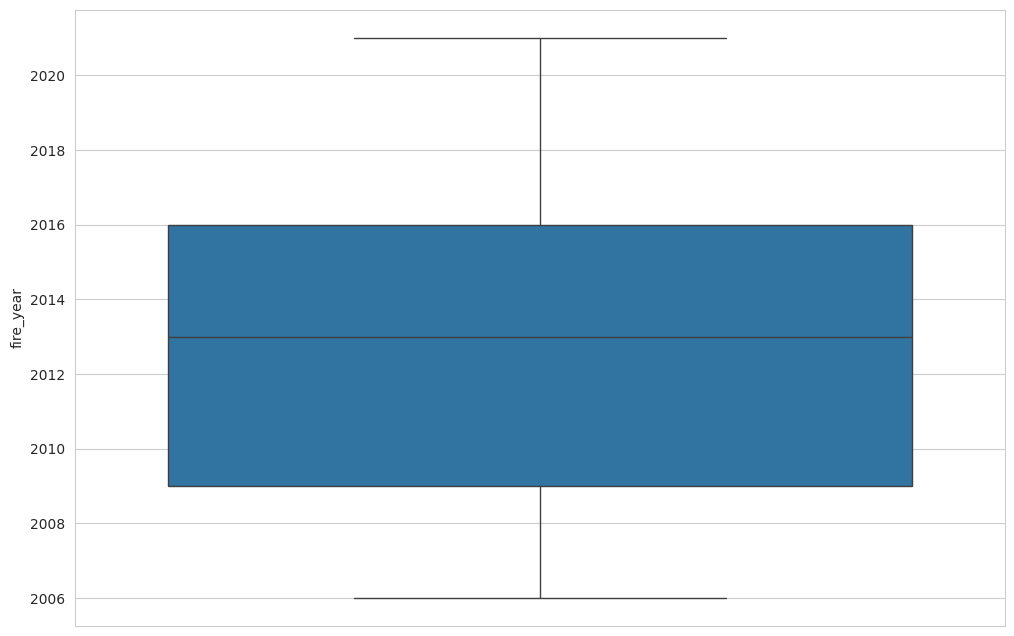

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df["fire_year"])
plt.show()

In [ ]:
df.columns[:30]
df.dtypes

fire_year                    int64
current_size               float64
fire_location_latitude     float64
fire_location_longitude    float64
assessment_hectares        float64
                            ...   
fuel_type_O1a              float64
fuel_type_O1b              float64
fuel_type_S1               float64
fuel_type_S2               float64
fuel_type_nan              float64
Length: 338, dtype: object

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20, weights="distance")
imputed = imputer.fit_transform(df)
df=pd.DataFrame(imputed, columns=df.columns)

In [ ]:
df.isnull().sum()

fire_year                  0
current_size               0
fire_location_latitude     0
fire_location_longitude    0
assessment_hectares        0
                          ..
fuel_type_O1a              0
fuel_type_O1b              0
fuel_type_S1               0
fuel_type_S2               0
fuel_type_nan              0
Length: 338, dtype: int64

In [ ]:
df.to_csv("prepped_final.csv")

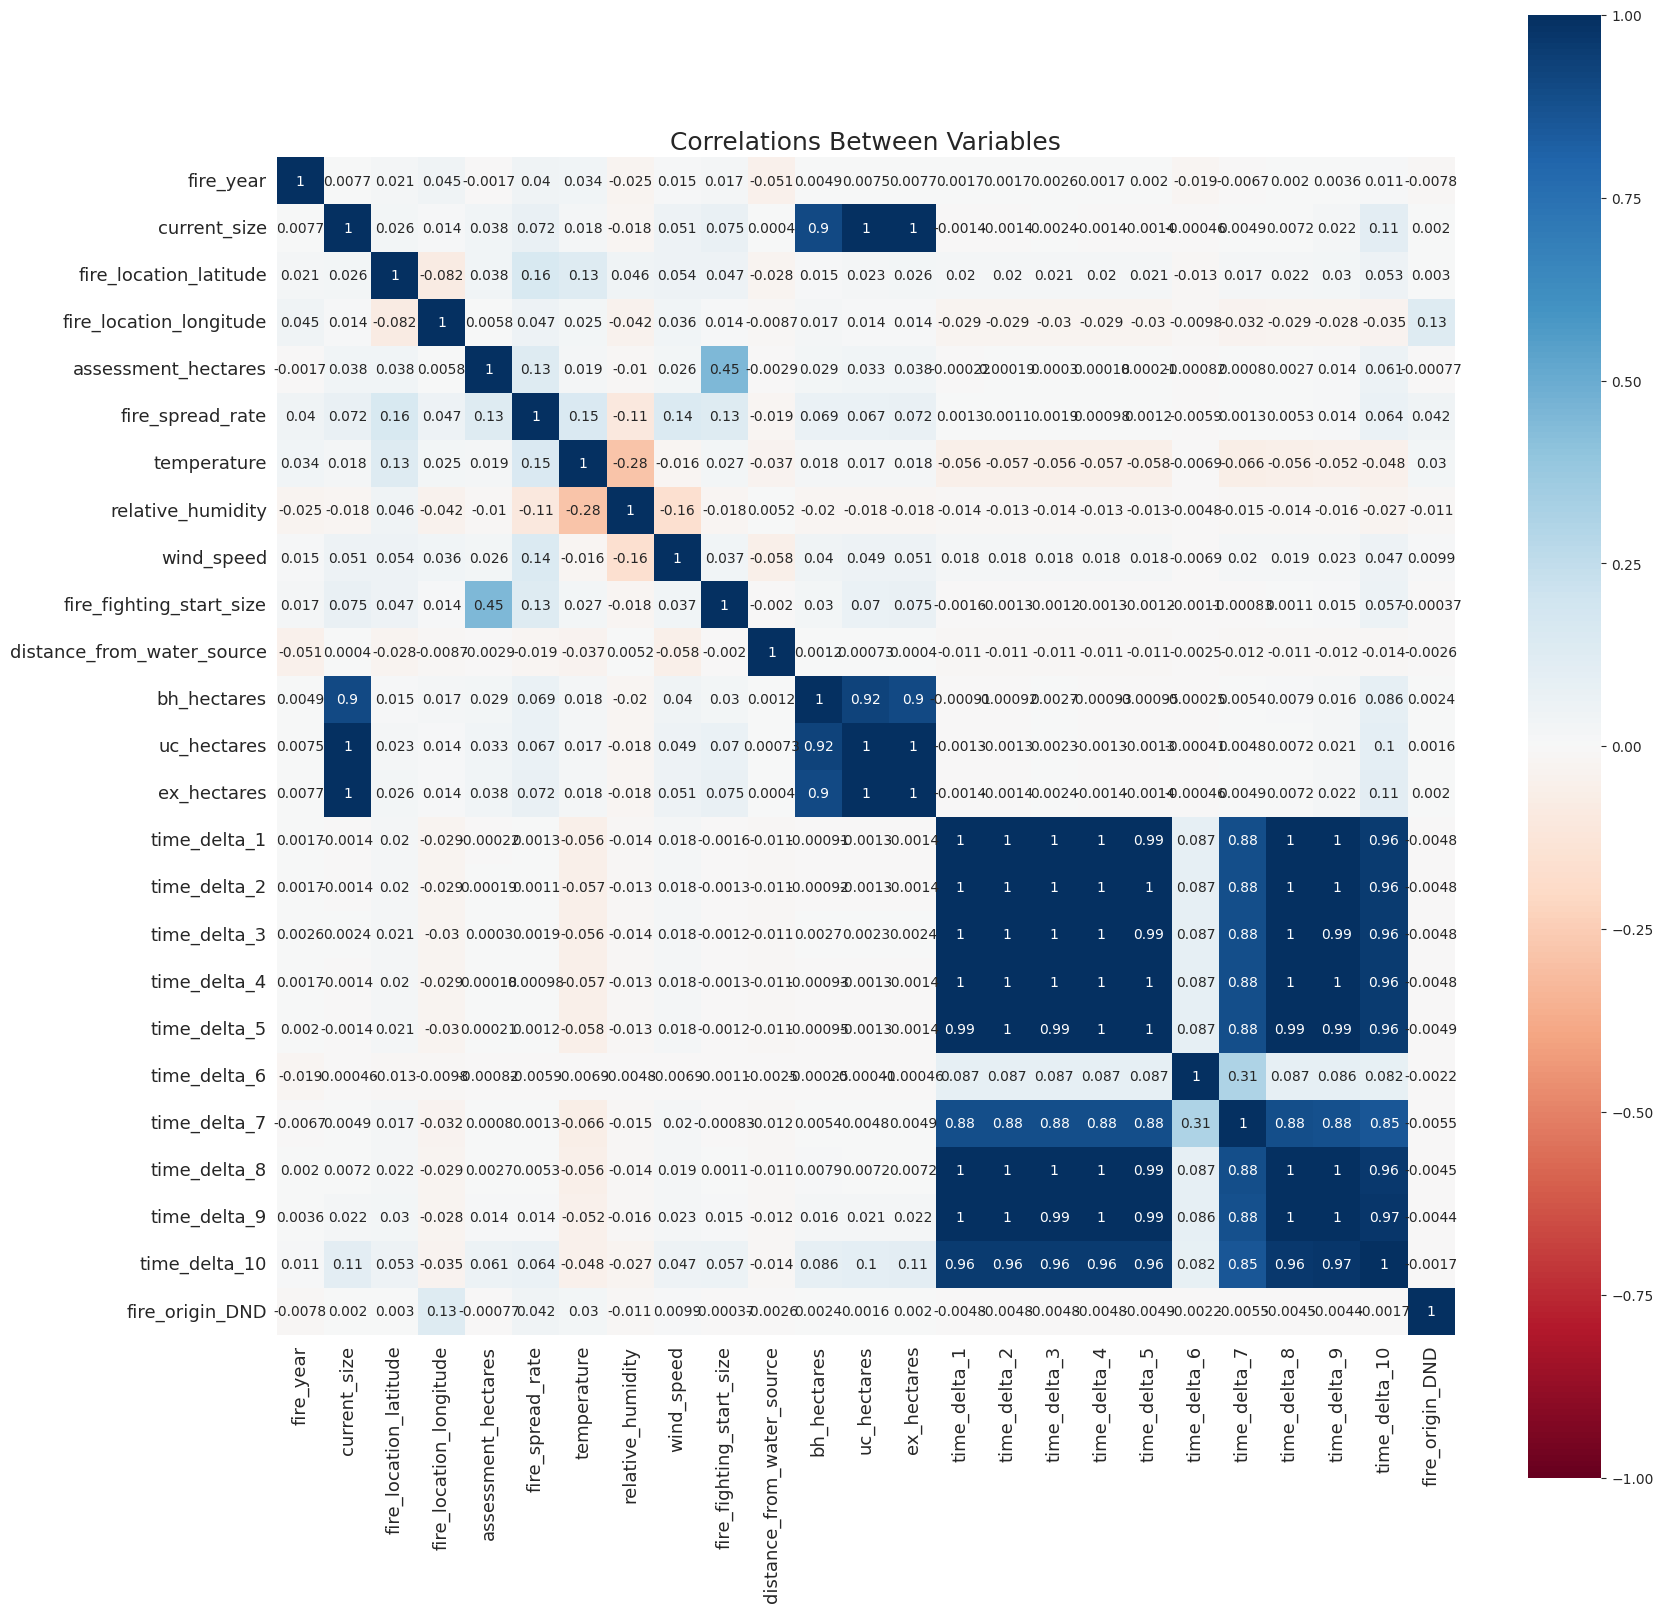

In [ ]:
selection = df.iloc[:, :25]
plt.figure(figsize = (19,19))
sns.heatmap(selection.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [ ]:
y=np.array(df["current_size"])
x=df.drop("current_size",axis=1)
features_list=list(x.columns)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17185, 337)
Training Labels Shape: (17185,)
Testing Features Shape: (5729, 337)
Testing Labels Shape: (5729,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² score: {r2}')


Mean Absolute Error (MAE): 260.31434297434095
Mean Squared Error (MSE): 44807605.57640247
Root Mean Squared Error (RMSE): 6693.848338317986
R² score: -0.033786094344655515


[0.13, 0.1, 0.09, 0.08, 0.04, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02]


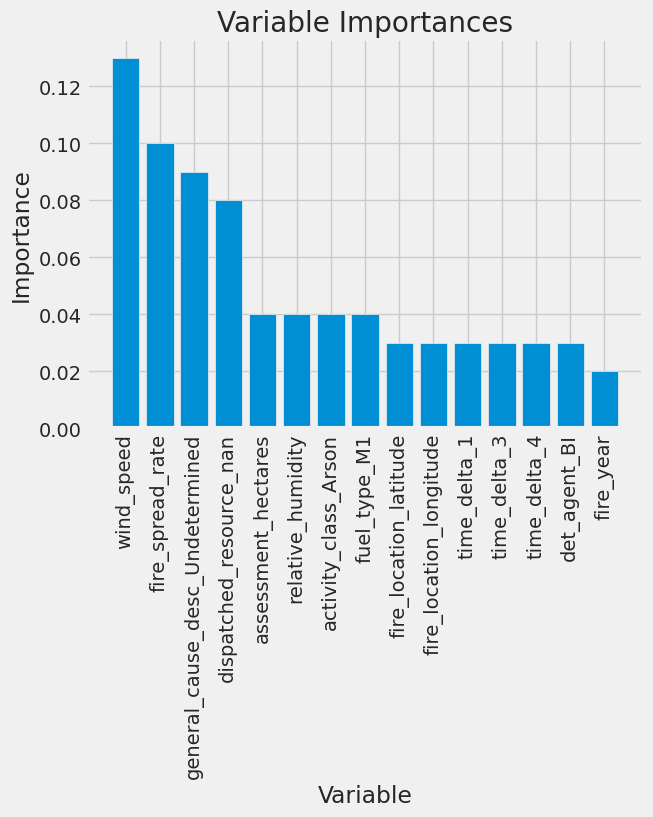

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)[:15]
importances=[x[1] for x in feature_importances]

print(importances)

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(feature_importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, [x[0] for x in feature_importances], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(features_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

updated=[pair[0] for pair in feature_importances if pair[1]>=0.0001]
print(len(updated))

Variable: wind_speed           Importance: 0.13017
Variable: fire_spread_rate     Importance: 0.10113
Variable: general_cause_desc_Undetermined Importance: 0.09173
Variable: dispatched_resource_nan Importance: 0.0781
Variable: relative_humidity    Importance: 0.04099
Variable: assessment_hectares  Importance: 0.04055
Variable: fuel_type_M1         Importance: 0.03759
Variable: activity_class_Arson Importance: 0.0364
Variable: fire_location_latitude Importance: 0.03169
Variable: time_delta_3         Importance: 0.03139
Variable: det_agent_BI         Importance: 0.03114
Variable: time_delta_1         Importance: 0.02643
Variable: time_delta_4         Importance: 0.02576
Variable: fire_location_longitude Importance: 0.02524
Variable: fire_position_on_slope_Bottom Importance: 0.02452
Variable: time_delta_2         Importance: 0.02341
Variable: temperature          Importance: 0.02175
Variable: distance_from_water_source Importance: 0.01774
Variable: fire_year            Importance: 0.01606

In [ ]:
df=df[updated]
x=df

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17185, 108)
Training Labels Shape: (17185,)
Testing Features Shape: (5729, 108)
Testing Labels Shape: (5729,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(x_train,y_train);

In [ ]:
y_pred = rf1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² score: {r2}')

Mean Absolute Error (MAE): 263.40001437598175
Mean Squared Error (MSE): 45171743.479863234
Root Mean Squared Error (RMSE): 6720.992745113123
R² score: -0.04218736230305331
